In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load the two datasets - train and test
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Check for missing values
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Text(0.5,1,'Percent missing data by feature')

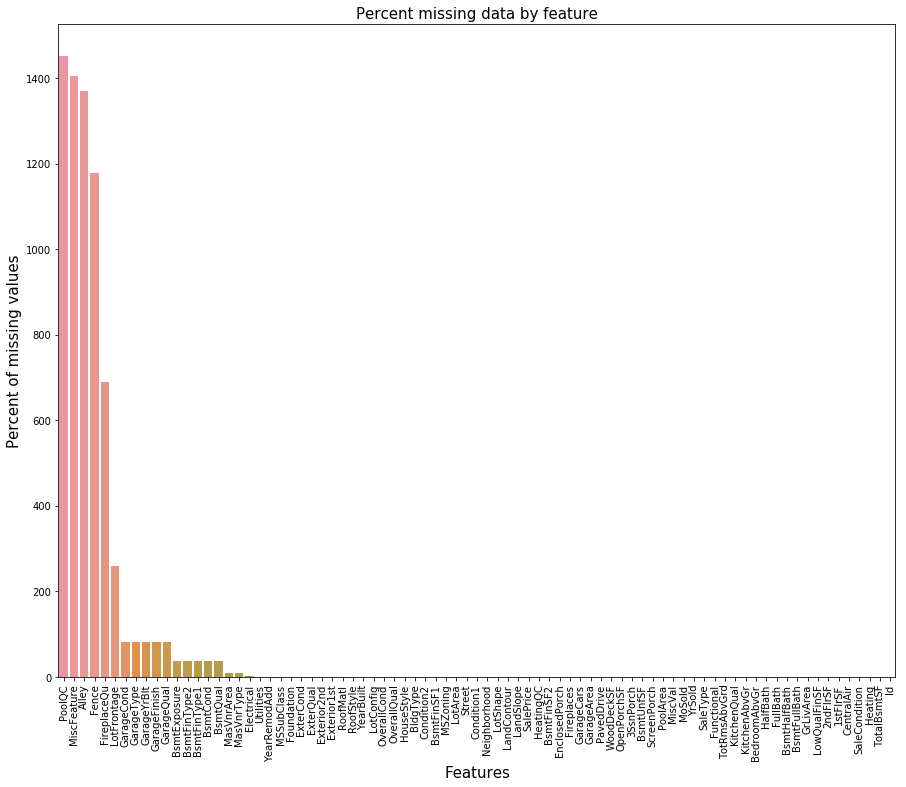

In [4]:
# Vizualize the missing values
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total.index, y=total)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [5]:
# make new columns indicating what will be imputed
cols_with_missing = [col for col in df_train.columns 
                                 if df_train[col].isnull().any()]
for col in cols_with_missing:
    df_train[col + '_was_missing'] = df_train[col].isnull().astype(int)

In [6]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 81]).index,1)

df_train.isnull().sum().max() 

81

In [8]:
numeric_columns = df_train.describe().columns
string_columns = list(set(df_train.columns) - set(numeric_columns))

In [9]:
df1 = df_train[numeric_columns]
df2 = df_train[string_columns]
df1 = df1.values
my_imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
df1 = my_imputer.fit_transform(df1)
df2 = df2.values
my_imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
df2 = my_imputer.fit_transform(df2)
dfvv = pd.DataFrame(df1,columns = numeric_columns)
dfvw = pd.DataFrame(df2,columns = string_columns)
df_train1 = pd.concat([dfvv,dfvw], axis = 1)
df_train1.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,Condition2,GarageFinish,ExterQual,BsmtExposure,Condition1,HeatingQC,KitchenQual,RoofStyle,Exterior1st
0,1.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,Normal,Norm,RFn,Gd,No,Norm,Ex,Gd,Gable,VinylSd
1,2.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,Normal,Norm,RFn,TA,Gd,Feedr,Ex,TA,Gable,MetalSd
2,3.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,Normal,Norm,RFn,Gd,Mn,Norm,Ex,Gd,Gable,VinylSd
3,4.0,70.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,Abnorml,Norm,Unf,TA,No,Norm,Gd,Gd,Gable,Wd Sdng
4,5.0,60.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,Normal,Norm,RFn,Gd,Av,Norm,Ex,Gd,Gable,VinylSd


In [10]:
df_train1.isnull().sum().max() 

0

In [11]:
from sklearn.preprocessing import LabelEncoder

# process columns, apply LabelEncoder to categorical features
for c in string_columns:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train1[c].values)) 
    df_train1[c] = lbl.transform(list(df_train1[c].values))

# shape        
print('Shape all_data: {}'.format(df_train1.shape))

Shape all_data: (1460, 94)


In [12]:
from sklearn.model_selection import train_test_split
seed = 4330
X = df_train1.drop(labels=['SalePrice'], axis=1)
y = df_train1['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=seed)

In [16]:
str_index = [X_train.columns.get_loc(c) for c in X_train.columns if c in string_columns]
one_hot = OneHotEncoder(sparse = False, categorical_features = str_index)
df_onehot_train = pd.DataFrame(one_hot.fit_transform(X_train))
df_onehot_test = pd.DataFrame(one_hot.fit_transform(X_test))

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train,y_train)

0.8430725329871149

In [20]:
lr.score(X_test,y_test)

0.8655239367947061

In [24]:
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_train,y_train)

0.8430693411344367

In [25]:
lasso.score(X_test,y_test)

0.865639567897069

In [26]:
poly = PolynomialFeatures(2)
pp_train = poly.fit_transform(X_train)
pp_test = poly.fit_transform(X_test)

In [28]:
lasso.fit(pp_train, np.log(y_train))
lasso.score(pp_train,np.log(y_train))

0.9508137345342206

In [29]:
lasso.score(pp_test,np.log(y_test))

0.7681892539426394

In [30]:
for a in [10e6, 10e7, 10e8, 10e9, 10e10]:
    print('alpha:', a)
    all_data_lr = Ridge(alpha=a).fit(pp_train, pd.np.log10(y_train))
    print(all_data_lr.score(pp_train, pd.np.log10(y_train)), all_data_lr.score(pp_test, pd.np.log10(y_test)))
    print()

alpha: 10000000.0
0.9755230812692357 0.06528186964750693

alpha: 100000000.0
0.9618268241607246 0.325302673763832

alpha: 1000000000.0
0.9472099160560756 0.385564588351495

alpha: 10000000000.0
0.9332986931022956 0.7877674031278178

alpha: 100000000000.0
0.9118224687524745 0.8741095436426465

